<a href="https://colab.research.google.com/github/westengine/tuberculosis-classification-ml/blob/main/tuberculosis_classification_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import collections as cl
import matplotlib.pyplot as plt
from sklearn.ensemble import *
import seaborn as sns
from sklearn.preprocessing import *
import warnings
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.inspection import permutation_importance

from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier

from sklearn.utils import *
from scipy.stats import chi2_contingency
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path=rf"/content/drive/MyDrive/TB-Dataset.csv"

In [ ]:
# read the data
df=pd.read_csv(file_path, header=1, na_values="E")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              1188 non-null   int64 
 1   Unnamed: 1              1188 non-null   object
 2   Unnamed: 2              1188 non-null   int64 
 3   Unnamed: 3              1188 non-null   object
 4   DS-TB
(Tick)            1188 non-null   bool  
 5   DR-TB
(Code)            1188 non-null   bool  
 6   Pulmonary (Lungs)       1188 non-null   bool  
 7   Extra-Pulmonary
(EPTB)  1188 non-null   bool  
 8   Suggestive              1188 non-null   bool  
 9   Not Suggestive          1188 non-null   bool  
 10  Unnamed: 10             1185 non-null   object
 11  Unnamed: 11             1166 non-null   object
 12  Unnamed: 12             1170 non-null   object
dtypes: bool(6), int64(2), object(5)
memory usage: 72.1+ KB


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Unnamed: 1,0
Unnamed: 2,0
Unnamed: 3,0
DS-TB\n(Tick),0
DR-TB\n(Code),0
Pulmonary (Lungs),0
Extra-Pulmonary\n(EPTB),0
Suggestive,0
Not Suggestive,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
print("Number of samples", df.shape[0])

Number of samples 1163


In [ ]:
#Display first 4
df.head(4)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,DS-TB\n(Tick),DR-TB\n(Code),Pulmonary (Lungs),Extra-Pulmonary\n(EPTB),Suggestive,Not Suggestive,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,01/10/2021,51,M,True,False,True,False,False,True,N,Omi-Adio,Ibadan
1,2,04/10/2021,70,M,True,False,True,False,False,True,N,Orita-Aperin,Ibadan
2,3,06/10/2021,70,M,True,False,True,False,False,True,N,Akobo,Ibadan
3,4,06/10/2021,9,F,True,False,True,False,False,True,N,Moniya,Ibadan


In [ ]:
#rename columns

columns=["sn", "Date", "Age", "Sex", "tbtype", "", "","","","", "TB_Diag", "Location", "Axis"]

for index,i in enumerate(df.columns):

    if i.startswith("Unnamed"):
        df.rename(columns={i:columns[index]}, inplace=True)


In [ ]:
df.head(3)

,sn,Date,Age,Sex,DS-TB\n(Tick),DR-TB\n(Code),Pulmonary (Lungs),Extra-Pulmonary\n(EPTB),Suggestive,Not Suggestive,TB_Diag,Location,Axis
0,1,01/10/2021,51,M,True,False,True,False,False,True,N,Omi-Adio,Ibadan
1,2,04/10/2021,70,M,True,False,True,False,False,True,N,Orita-Aperin,Ibadan
2,3,06/10/2021,70,M,True,False,True,False,False,True,N,Akobo,Ibadan


In [ ]:
#Drop unnnecessary columns
df.drop(["sn"], inplace=True, axis=1, errors="ignore")

In [ ]:
df["TB_Diag"].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
df

,Date,Age,Sex,DS-TB\n(Tick),DR-TB\n(Code),Pulmonary (Lungs),Extra-Pulmonary\n(EPTB),Suggestive,Not Suggestive,TB_Diag,Location,Axis
0,01/10/2021,51,M,True,False,True,False,False,True,N,Omi-Adio,Ibadan
1,04/10/2021,70,M,True,False,True,False,False,True,N,Orita-Aperin,Ibadan
2,06/10/2021,70,M,True,False,True,False,False,True,N,Akobo,Ibadan
3,06/10/2021,9,F,True,False,True,False,False,True,N,Moniya,Ibadan
4,07/10/2021,62,F,True,False,True,False,False,True,N,Agbamu-Express,Ibadan
...,...,...,...,...,...,...,...,...,...,...,...,...
1183,25/06/2024,33,M,True,False,True,False,False,True,N,Bodija,Ibadan
1184,27/06/2024,40,M,True,False,True,False,False,True,N,Moniya,Ibadan
1185,28/06/2024,39,F,True,False,True,False,False,True,N,Bodija,Ibadan
1186,28/06/2024,27,M,True,False,True,False,False,True,N,Idi Imo,Ibadan


from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('DS-TB\n(Tick)').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('DR-TB\n(Code)').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Suggestive').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('DS-TB\n(Tick)')):
  _plot_series(series, series_name, i)
  fig.legend(title='DS-TB\n(Tick)', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('DR-TB\n(Code)')):
  _plot_series(series, series_name, i)
  fig.legend(title='DR-TB\n(Code)', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Suggestive')):
  _plot_series(series, series_name, i)
  fig.legend(title='Suggestive', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
df['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['DS-TB\n(Tick)'].value_counts()
    for x_label, grp in df.groupby('Sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sex')
_ = plt.ylabel('DS-TB\n(Tick)')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['DR-TB\n(Code)'].value_counts()
    for x_label, grp in df.groupby('DS-TB\n(Tick)')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('DS-TB\n(Tick)')
_ = plt.ylabel('DR-TB\n(Code)')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Suggestive'].value_counts()
    for x_label, grp in df.groupby('DR-TB\n(Code)')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('DR-TB\n(Code)')
_ = plt.ylabel('Suggestive')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Not Suggestive'].value_counts()
    for x_label, grp in df.groupby('Suggestive')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Suggestive')
_ = plt.ylabel('Not Suggestive')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='Sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['DS-TB\n(Tick)'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='DS-TB\n(Tick)', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['DR-TB\n(Code)'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='DR-TB\n(Code)', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Suggestive'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='Suggestive', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

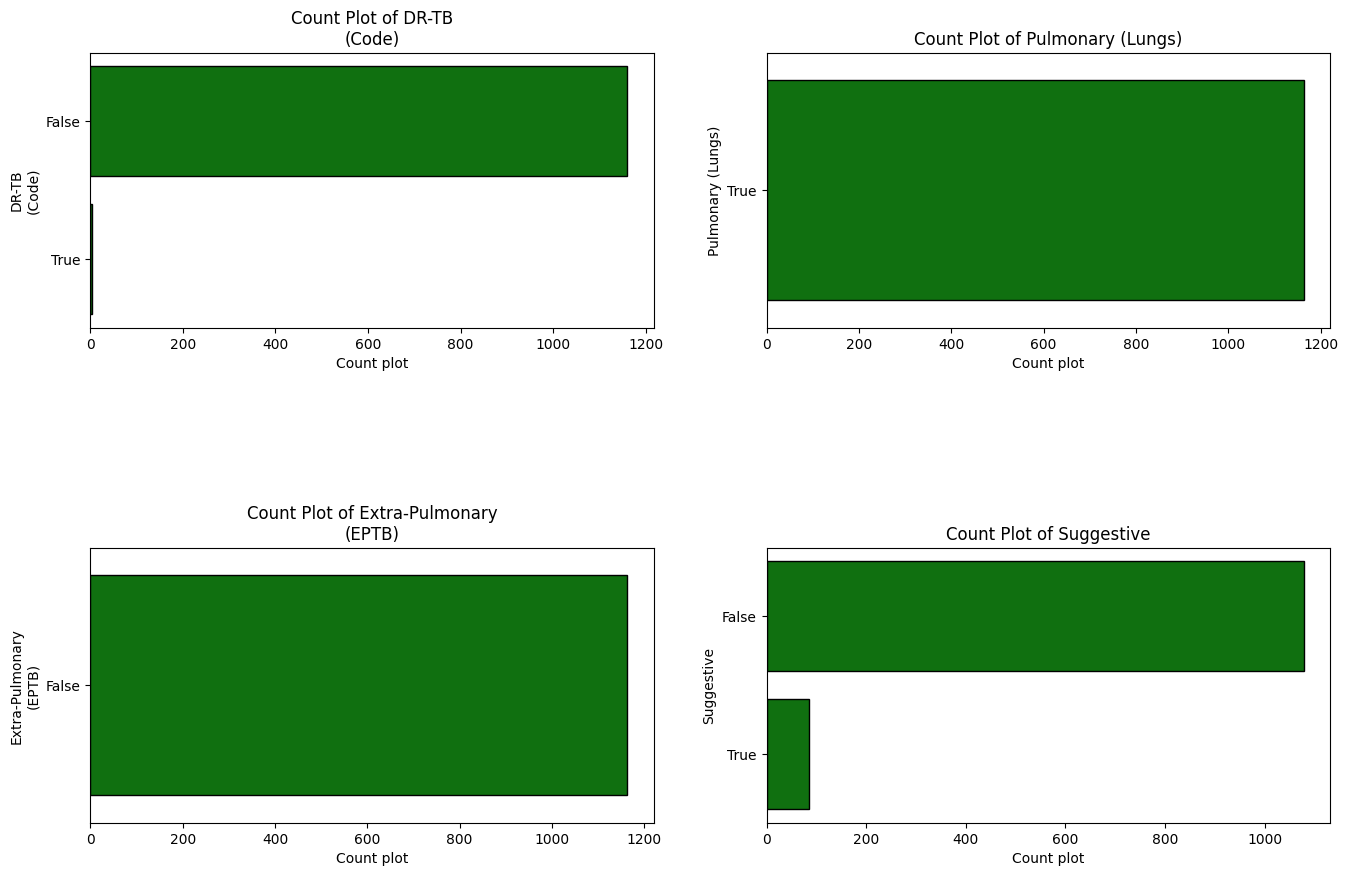

In [ ]:
#Encode TB_DIAG
plt.figure(figsize=(16, 10))
columns_index=[4, 5, 6,7]
for i in range(4):
    plt.subplot(2,2, i+1)
    plt.title(f"Count Plot of {df.columns[columns_index[i]]}")
    if df.iloc[:, columns_index[i]].dtype==bool:

        df.iloc[:, columns_index[i]]=df.iloc[:, columns_index[i]].astype(str)
    sns.countplot(df.iloc[:, columns_index[i]], edgecolor="black", color="green")
    plt.xlabel("Count plot")

plt.subplots_adjust(hspace=.8)

In [ ]:
df.columns
c2_index=[2, 8,9, -3]

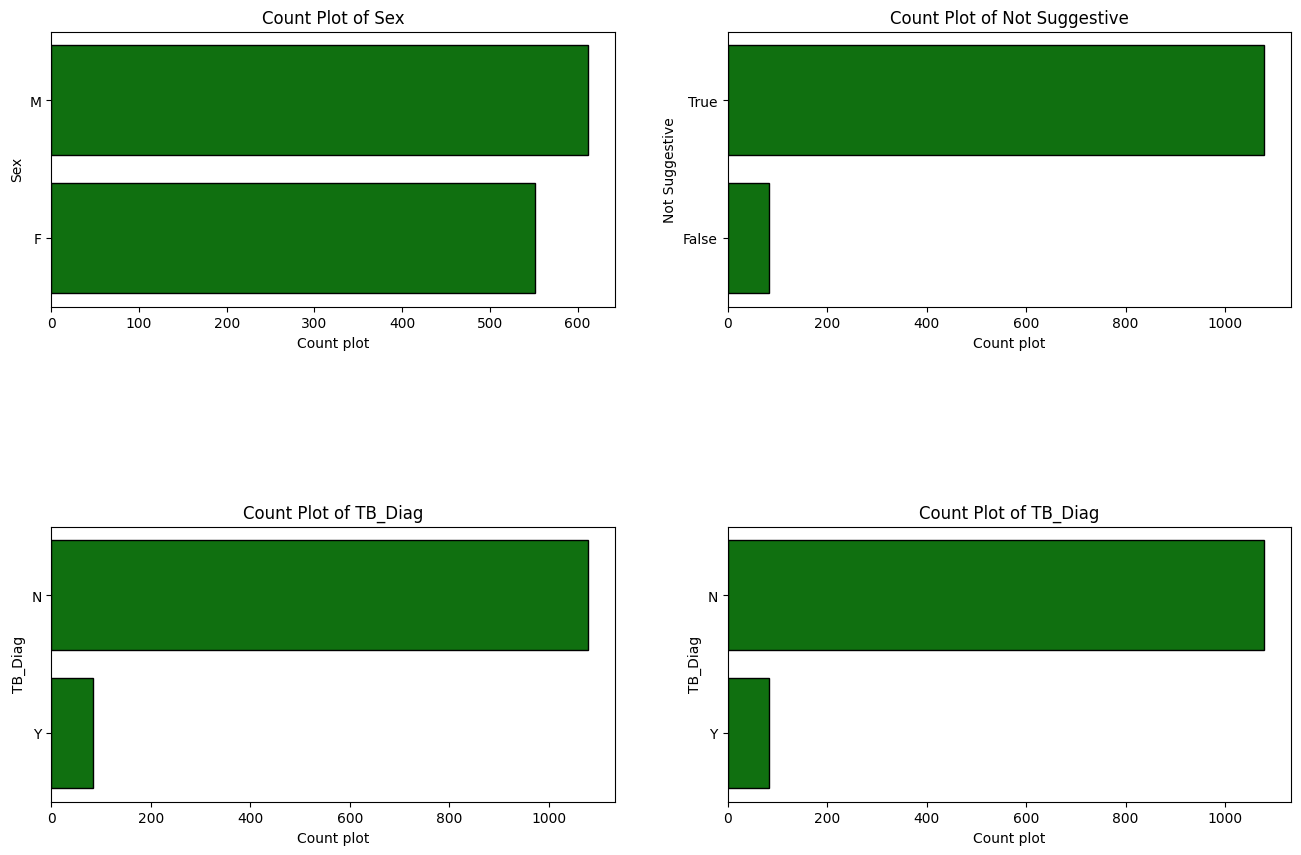

In [ ]:
#Encode TB_DIAG
plt.figure(figsize=(16, 10))
columns_index=c2_index
for i in range(4):
    plt.subplot(2,2, i+1)
    plt.title(f"Count Plot of {df.columns[columns_index[i]]}")
    if df.iloc[:, columns_index[i]].dtype==bool:

        df.iloc[:, columns_index[i]]=df.iloc[:, columns_index[i]].astype(str)
    sns.countplot(df.iloc[:, columns_index[i]], edgecolor="black", color="green")
    plt.xlabel("Count plot")

plt.subplots_adjust(hspace=.8)

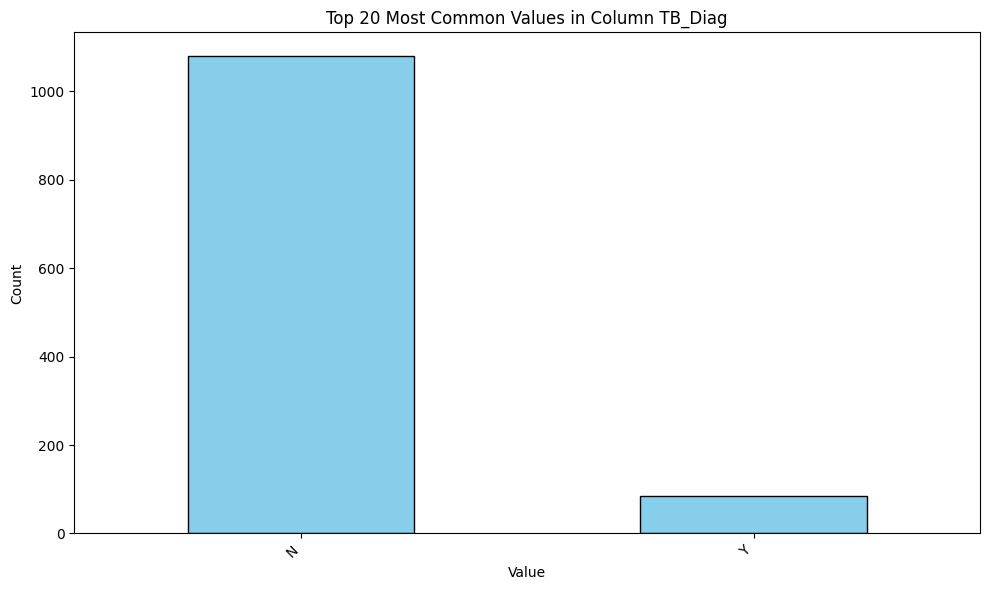

In [ ]:
r1 = cl.Counter(df.iloc[:, columns_index[i]]).most_common(20)
df1 = pd.DataFrame(r1, columns=['Value', 'Count'])

df1.plot(kind='bar', x='Value', y='Count', legend=False, figsize=(10, 6), color='skyblue', edgecolor="black")
# Customize the plot
plt.title(f'Top 20 Most Common Values in Column {df.columns[columns_index[i]]}')
plt.xlabel('Value')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

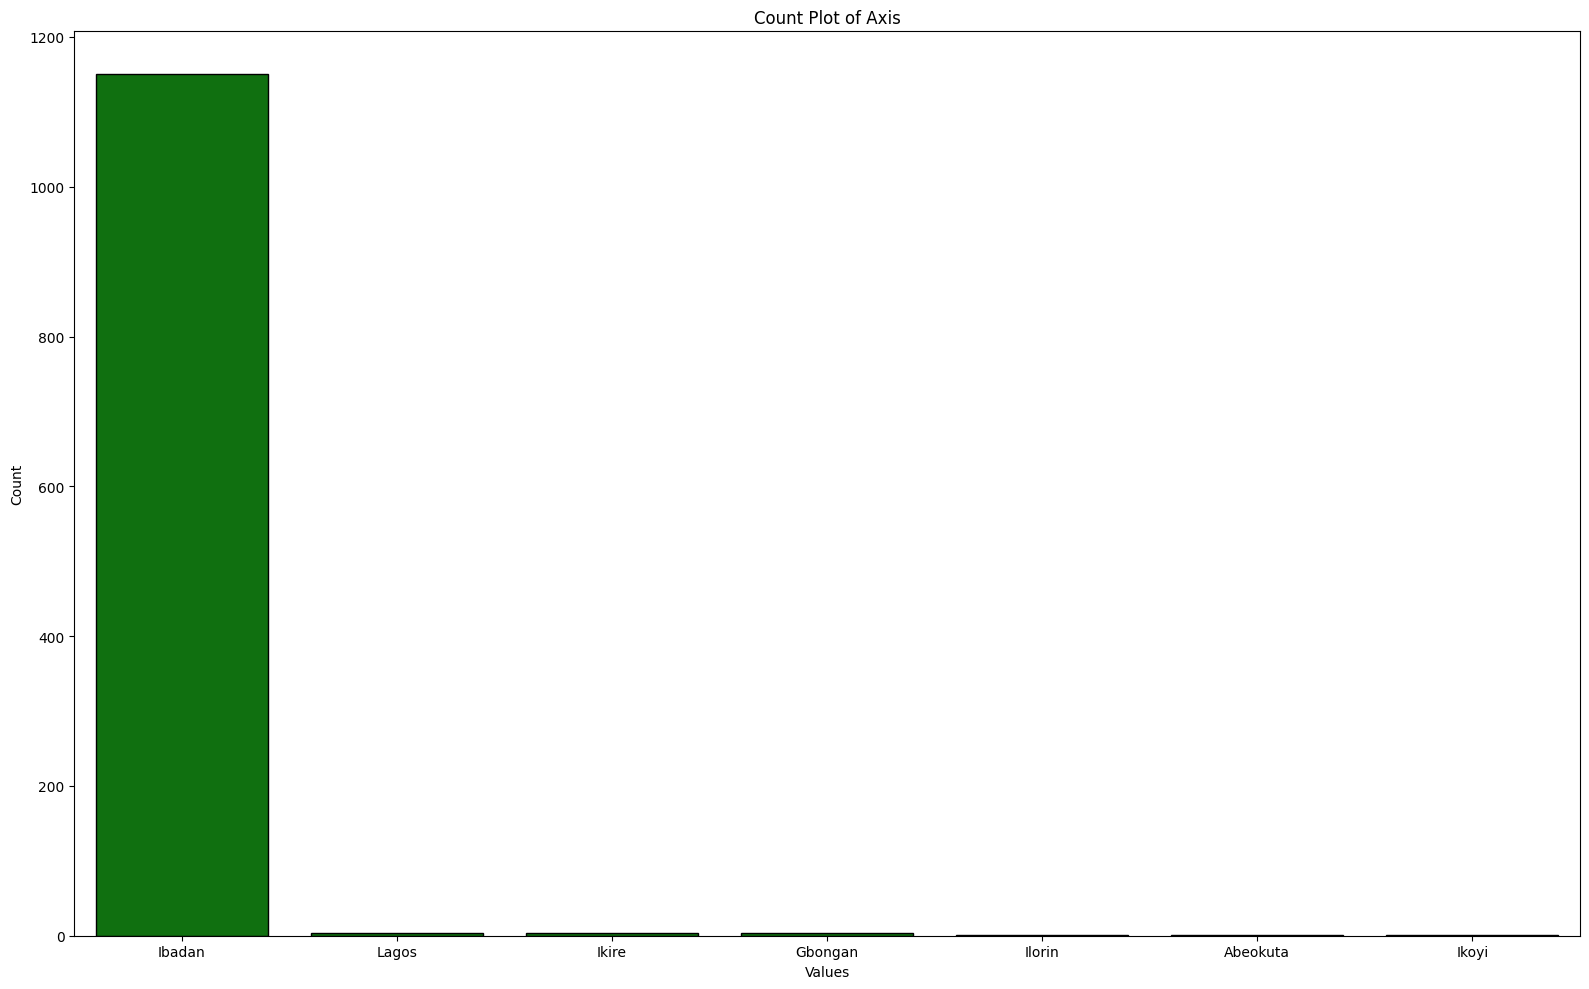

In [ ]:
c3_index = [-1]
plt.figure(figsize=(16, 10))

for i in range(len(c3_index)):
    plt.title(f"Count Plot of {df.columns[c3_index[i]]}")  # Set the title

    # Check if the column is of type bool and convert to string if necessary
    if df.iloc[:, c3_index[i]].dtype == bool:
        df.iloc[:, c3_index[i]] = df.iloc[:, c3_index[i]].astype(str)

    # Create the count plot
    sns.countplot(x=df.iloc[:, c3_index[i]], edgecolor="black", color="green")
    plt.xlabel("Values")  # Label for the x-axis
    plt.ylabel("Count")   # Label for the y-axis

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
df.dtypes

,0
Date,object
Age,int64
Sex,object
DS-TB\n(Tick),bool
DR-TB\n(Code),object
Pulmonary (Lungs),object
Extra-Pulmonary\n(EPTB),object
Suggestive,object
Not Suggestive,object
TB_Diag,object


In [ ]:
#Encode the Target variable
target_encoder={"Y":1, "N":0}
df["TB_Diag"]=df["TB_Diag"].map(target_encoder)

In [ ]:
df

,Date,Age,Sex,DS-TB\n(Tick),DR-TB\n(Code),Pulmonary (Lungs),Extra-Pulmonary\n(EPTB),Suggestive,Not Suggestive,TB_Diag,Location,Axis
0,01/10/2021,51,M,True,False,True,False,False,True,0,Omi-Adio,Ibadan
1,04/10/2021,70,M,True,False,True,False,False,True,0,Orita-Aperin,Ibadan
2,06/10/2021,70,M,True,False,True,False,False,True,0,Akobo,Ibadan
3,06/10/2021,9,F,True,False,True,False,False,True,0,Moniya,Ibadan
4,07/10/2021,62,F,True,False,True,False,False,True,0,Agbamu-Express,Ibadan
...,...,...,...,...,...,...,...,...,...,...,...,...
1183,25/06/2024,33,M,True,False,True,False,False,True,0,Bodija,Ibadan
1184,27/06/2024,40,M,True,False,True,False,False,True,0,Moniya,Ibadan
1185,28/06/2024,39,F,True,False,True,False,False,True,0,Bodija,Ibadan
1186,28/06/2024,27,M,True,False,True,False,False,True,0,Idi Imo,Ibadan


In [ ]:
df.head(2)

,Date,Age,Sex,DS-TB\n(Tick),DR-TB\n(Code),Pulmonary (Lungs),Extra-Pulmonary\n(EPTB),Suggestive,Not Suggestive,TB_Diag,Location,Axis
0,01/10/2021,51,M,True,False,True,False,False,True,0,Omi-Adio,Ibadan
1,04/10/2021,70,M,True,False,True,False,False,True,0,Orita-Aperin,Ibadan


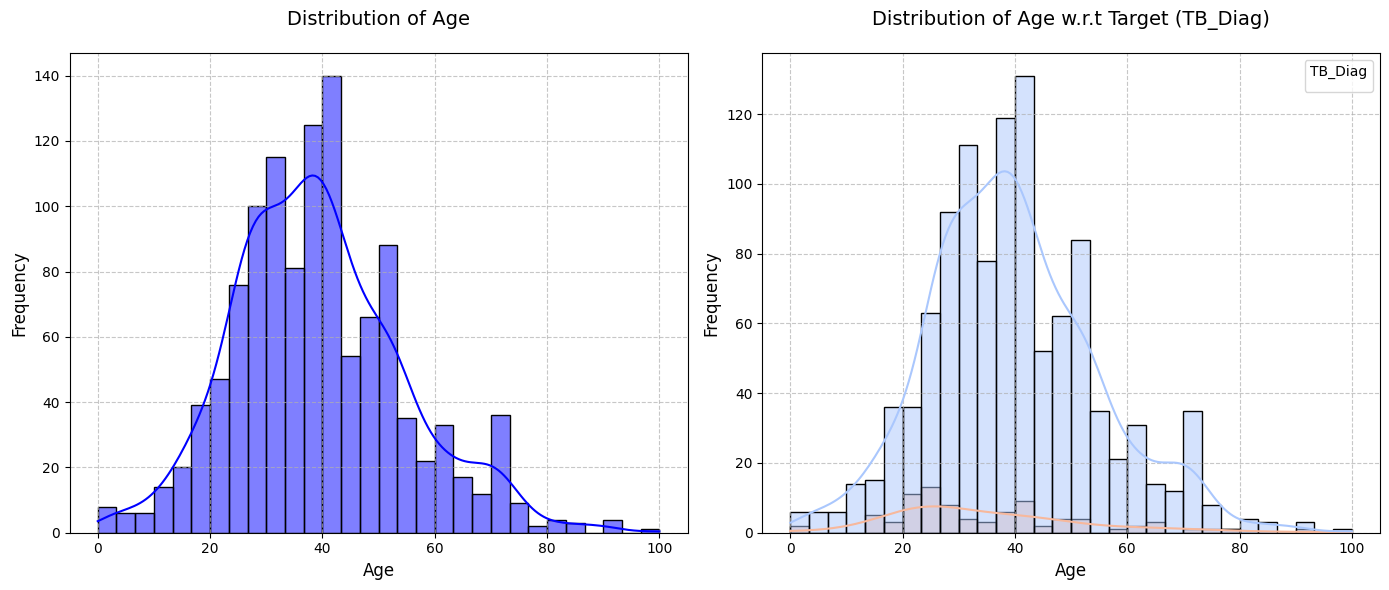

In [ ]:
# Set the overall figure size
plt.figure(figsize=(14, 6))

# Plot 1: Distribution of Ages
plt.subplot(1, 2, 1)
sns.histplot(df["Age"], color="blue", kde=True, bins=30)
plt.grid(True, linestyle="--", alpha=0.7)
plt.title("Distribution of Age", fontsize=14, pad=20)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)  # Label for y-axis

# Plot 2: Distribution of Ages w.r.t Target (TB_Diag)
plt.subplot(1, 2, 2)
sns.histplot(x=df["Age"], hue=df["TB_Diag"], kde=True, palette="coolwarm", bins=30)
plt.grid(True, linestyle="--", alpha=0.7)
plt.title("Distribution of Age w.r.t Target (TB_Diag)", fontsize=14, pad=20)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="TB_Diag", loc="upper right")

plt.tight_layout()
plt.show()

In [ ]:
df.head(2)


,Date,Age,Sex,DS-TB\n(Tick),DR-TB\n(Code),Pulmonary (Lungs),Extra-Pulmonary\n(EPTB),Suggestive,Not Suggestive,TB_Diag,Location,Axis
0,01/10/2021,51,M,True,False,True,False,False,True,0,Omi-Adio,Ibadan
1,04/10/2021,70,M,True,False,True,False,False,True,0,Orita-Aperin,Ibadan


In [ ]:
df.select_dtypes(include="object").iloc[:, 1:]

,Sex,DR-TB\n(Code),Pulmonary (Lungs),Extra-Pulmonary\n(EPTB),Suggestive,Not Suggestive,Location,Axis
0,M,False,True,False,False,True,Omi-Adio,Ibadan
1,M,False,True,False,False,True,Orita-Aperin,Ibadan
2,M,False,True,False,False,True,Akobo,Ibadan
3,F,False,True,False,False,True,Moniya,Ibadan
4,F,False,True,False,False,True,Agbamu-Express,Ibadan
...,...,...,...,...,...,...,...,...
1183,M,False,True,False,False,True,Bodija,Ibadan
1184,M,False,True,False,False,True,Moniya,Ibadan
1185,F,False,True,False,False,True,Bodija,Ibadan
1186,M,False,True,False,False,True,Idi Imo,Ibadan


In [ ]:
 df.select_dtypes(include=["object","bool"])

,Date,Sex,DS-TB\n(Tick),DR-TB\n(Code),Pulmonary (Lungs),Extra-Pulmonary\n(EPTB),Suggestive,Not Suggestive,Location,Axis
0,01/10/2021,M,True,False,True,False,False,True,Omi-Adio,Ibadan
1,04/10/2021,M,True,False,True,False,False,True,Orita-Aperin,Ibadan
2,06/10/2021,M,True,False,True,False,False,True,Akobo,Ibadan
3,06/10/2021,F,True,False,True,False,False,True,Moniya,Ibadan
4,07/10/2021,F,True,False,True,False,False,True,Agbamu-Express,Ibadan
...,...,...,...,...,...,...,...,...,...,...
1183,25/06/2024,M,True,False,True,False,False,True,Bodija,Ibadan
1184,27/06/2024,M,True,False,True,False,False,True,Moniya,Ibadan
1185,28/06/2024,F,True,False,True,False,False,True,Bodija,Ibadan
1186,28/06/2024,M,True,False,True,False,False,True,Idi Imo,Ibadan


In [ ]:
#Dependence test using CHI SQUARE TO CHECK FOR IMPORTANT FEATURES

target = "TB_Diag"
for feature in df.select_dtypes(include=["object", "bool"]).columns:
    contingency_table = pd.crosstab(df[feature], df[target])
    chi2, p, _, _ = chi2_contingency(contingency_table)

    print(f"Feature: {feature}, p-value: {p}")

    if p < 0.05:
        print(f"✅ {feature} is significantly correlated with {target}\n")
    else:
        print(f"❌ {feature} is NOT significantly correlated with {target}\n")


In [ ]:
df.head(3)

,Date,Age,Sex,DS-TB\n(Tick),DR-TB\n(Code),Pulmonary (Lungs),Extra-Pulmonary\n(EPTB),Suggestive,Not Suggestive,TB_Diag,Location,Axis
0,01/10/2021,51,M,True,False,True,False,False,True,0,Omi-Adio,Ibadan
1,04/10/2021,70,M,True,False,True,False,False,True,0,Orita-Aperin,Ibadan
2,06/10/2021,70,M,True,False,True,False,False,True,0,Akobo,Ibadan


In [ ]:
df.drop("Date",  axis=1, inplace=True, errors="ignore") # Date is when the data collected

In [ ]:
df.head(3)

,Age,Sex,DS-TB\n(Tick),DR-TB\n(Code),Pulmonary (Lungs),Extra-Pulmonary\n(EPTB),Suggestive,Not Suggestive,TB_Diag,Location,Axis
0,51,M,True,False,True,False,False,True,0,Omi-Adio,Ibadan
1,70,M,True,False,True,False,False,True,0,Orita-Aperin,Ibadan
2,70,M,True,False,True,False,False,True,0,Akobo,Ibadan


In [ ]:
obj=df.select_dtypes(include=["object","bool"])
label_encode=LabelEncoder()
for i in obj.columns:
    df[i]=label_encode.fit_transform(obj[i])

In [ ]:
features=df
features.head(3)

,Age,Sex,DS-TB\n(Tick),DR-TB\n(Code),Pulmonary (Lungs),Extra-Pulmonary\n(EPTB),Suggestive,Not Suggestive,TB_Diag,Location,Axis
0,51,1,1,0,0,0,0,1,0,218,2
1,70,1,1,0,0,0,0,1,0,232,2
2,70,1,1,0,0,0,0,1,0,35,2


In [ ]:
target=features["TB_Diag"]
target.shape

(1163,)

In [ ]:
target.value_counts()

,count
TB_Diag,
0,1079
1,84


In [ ]:
## Data upsampling due to imbalance

In [ ]:
class_Zero=features[features["TB_Diag"]==0][:400]
class1=features[features["TB_Diag"]==1]

In [ ]:
df_minority_upsampled = resample(class1,
                                 replace=True,   # Sample with replacement
                                 n_samples=400,  # Match majority class
                                 random_state=42)

In [ ]:
new_df=pd.concat([class_Zero, df_minority_upsampled], axis=0)

In [ ]:
new_df.shape

(800, 11)

In [ ]:
targets=new_df["TB_Diag"]
new_df.drop(["TB_Diag"], axis=1, inplace=True, errors="ignore")

In [ ]:
new_df.head(3)

,Age,Sex,DS-TB\n(Tick),DR-TB\n(Code),Pulmonary (Lungs),Extra-Pulmonary\n(EPTB),Suggestive,Not Suggestive,Location,Axis
0,51,1,1,0,0,0,0,1,218,2
1,70,1,1,0,0,0,0,1,232,2
2,70,1,1,0,0,0,0,1,35,2


In [ ]:
df["Age"]=(df["Age"]-df["Age"].mean())/df["Age"].std()

In [ ]:
new_df.shape, targets.shape

((800, 10), (800,))

In [ ]:
targets.head(3)

,TB_Diag
0,0
1,0
2,0


In [ ]:
df.columns

Index(['Age', 'Sex', 'DS-TB\n(Tick)', 'DR-TB\n(Code)', 'Pulmonary (Lungs)',
       'Extra-Pulmonary\n(EPTB)', 'Suggestive', 'Not Suggestive', 'TB_Diag',
       'Location', 'Axis'],
      dtype='object')

In [ ]:
# Drop non-significant features
features_to_drop = ["Sex", "Pulmonary (Lungs)", "Extra-Pulmonary\n(EPTB)"]
data_reduced = new_df.drop(columns=features_to_drop)



In [ ]:
train, test,train_label, test_label= train_test_split(data_reduced, targets, train_size=.90)
print("Train shape", train.shape[0], "Test shape", test.shape[0])

Train shape 720 Test shape 80


In [ ]:
train_label.value_counts()

,count
TB_Diag,
1,363
0,357


# MODEL FITTING

**USING: SVC MODEL**

In [ ]:
# from sklearn.linear_model import *
from sklearn.svm import SVC
svc=SVC(C=31, degree=1, probability=True)



In [ ]:
svc.fit(train, train_label)#Fitting the model

SVC(C=31, degree=1, probability=True)

In [ ]:
report=classification_report(test_label,svc.predict(test)) # Model scores
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.97      0.97      0.97        37

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



In [ ]:
# Compute Permutation Importance
result = permutation_importance(svc, train, train_label, n_repeats=10, random_state=42, scoring='accuracy')

# Create DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': train.columns, 'Importance': result.importances_mean})

# Sort by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)


In [ ]:
print("Feature Importance (Sorted):")
print(importance_df)


Feature Importance (Sorted):
          Feature  Importance
3      Suggestive    0.177361
4  Not Suggestive    0.177361
0             Age    0.011944
5        Location    0.005972
6            Axis    0.001389
1   DS-TB\n(Tick)    0.000139
2   DR-TB\n(Code)    0.000139


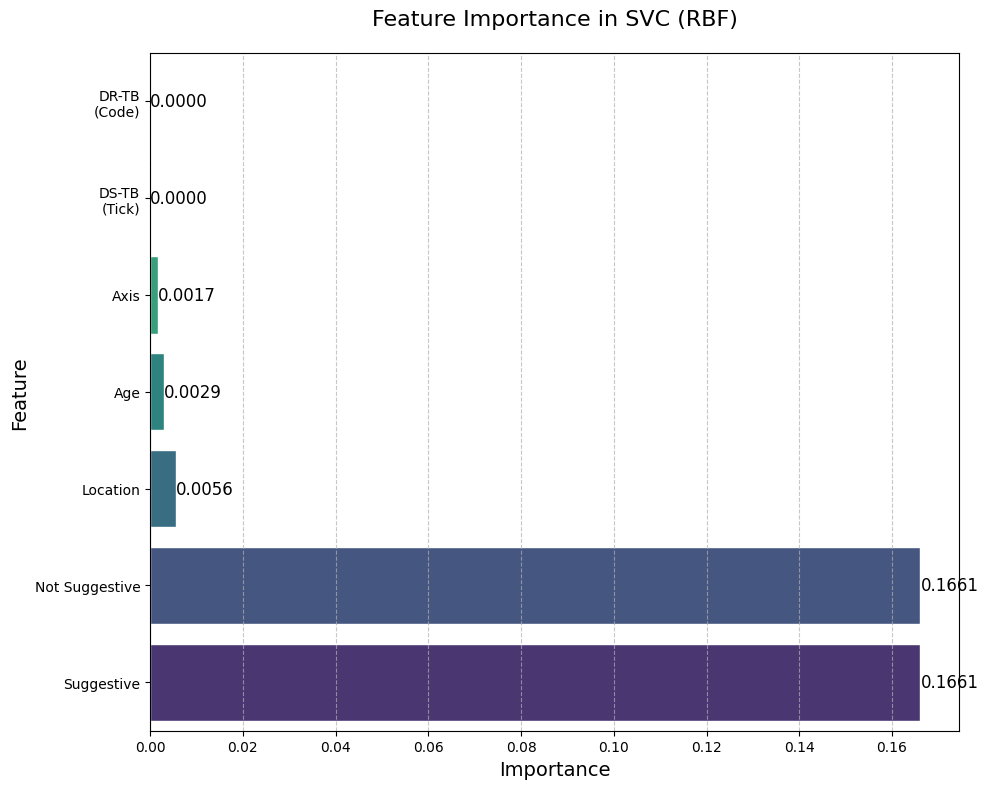

In [ ]:
plt.figure(figsize=(10, 8))

sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', edgecolor='w')

plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.title("Feature Importance in SVC (RBF)", fontsize=16, pad=20)

plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()

for index, value in enumerate(importance_df['Importance']):
    plt.text(value, index, f'{value:.4f}', va='center', fontsize=12, color='black')
plt.tight_layout()
plt.show()

In [ ]:
report=classification_report(test_label,svc.predict(test)) # Model scores
print(report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        44
           1       0.97      0.94      0.96        36

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



In [ ]:
report=classification_report(test_label,svc.predict(test), output_dict=True)
print(report)

{'0': {'precision': 0.9555555555555556, 'recall': 0.9772727272727273, 'f1-score': 0.9662921348314607, 'support': 44.0}, '1': {'precision': 0.9714285714285714, 'recall': 0.9444444444444444, 'f1-score': 0.9577464788732394, 'support': 36.0}, 'accuracy': 0.9625, 'macro avg': {'precision': 0.9634920634920635, 'recall': 0.9608585858585859, 'f1-score': 0.96201930685235, 'support': 80.0}, 'weighted avg': {'precision': 0.9626984126984126, 'recall': 0.9625, 'f1-score': 0.962446589650261, 'support': 80.0}}


<Figure size 1200x800 with 0 Axes>

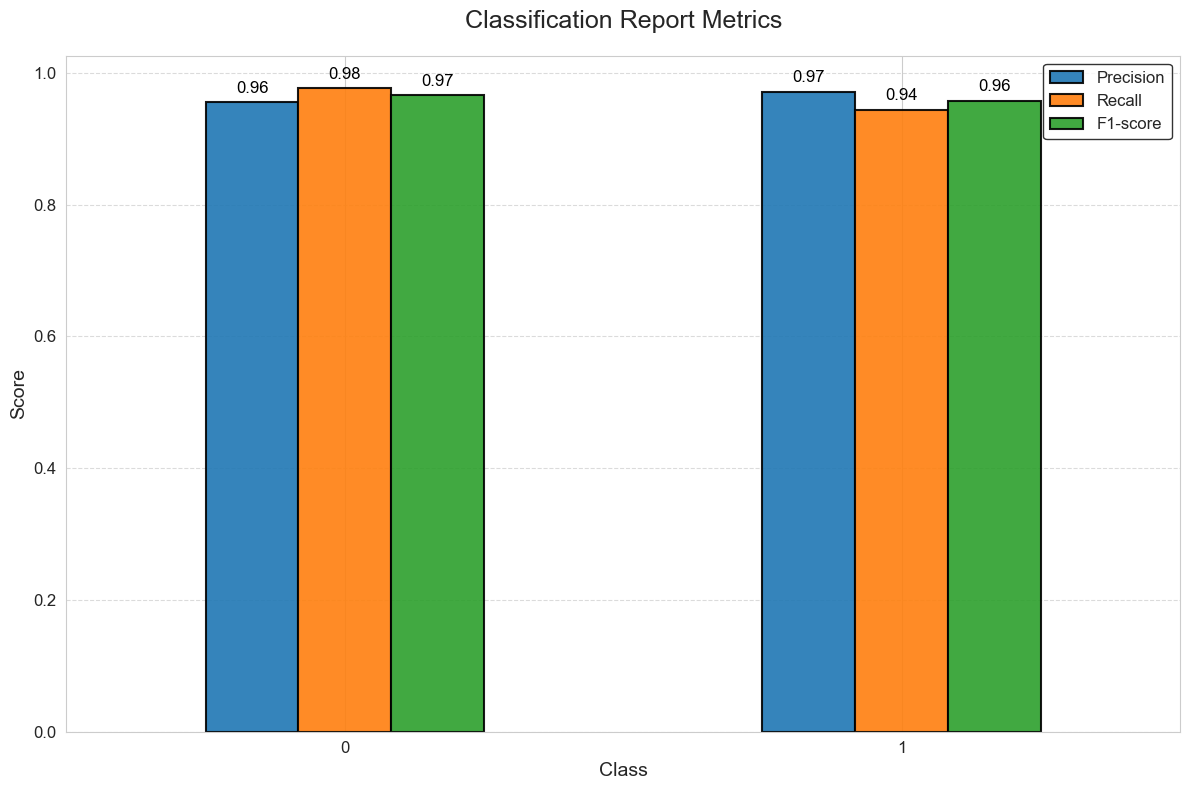

In [ ]:
df_report = pd.DataFrame(report).T.iloc[:-3, :-1]  # Exclude support and averages
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")  # Use a clean grid style
ax = df_report.plot(kind="bar", figsize=(12, 8), color=["#1f77b4", "#ff7f0e", "#2ca02c"], alpha=0.9, edgecolor="black", linewidth=1.5)
plt.title("Classification Report Metrics", fontsize=18, pad=20)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.xticks(rotation=0, fontsize=12)  # Keep class labels horizontal
plt.yticks(fontsize=12)

plt.legend(["Precision", "Recall", "F1-score"], loc="upper right", fontsize=12, frameon=True, facecolor="white", edgecolor="black")
plt.grid(axis="y", linestyle="--", alpha=0.7)

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}",  # Format to 2 decimal places
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Position of the label
        ha="center",  # Horizontal alignment
        va="center",  # Vertical alignment
        xytext=(0, 10),  # Offset from the bar
        textcoords="offset points",  # Coordinate system for the offset
        fontsize=12,  # Font size
        color="black",  # Text color
    )

plt.tight_layout()

# Show the plot
plt.show()

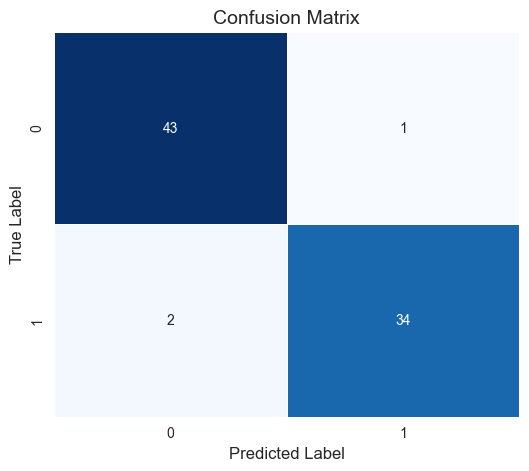

In [ ]:
cm = confusion_matrix(test_label, svc.predict(test))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False)

plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)

plt.show()


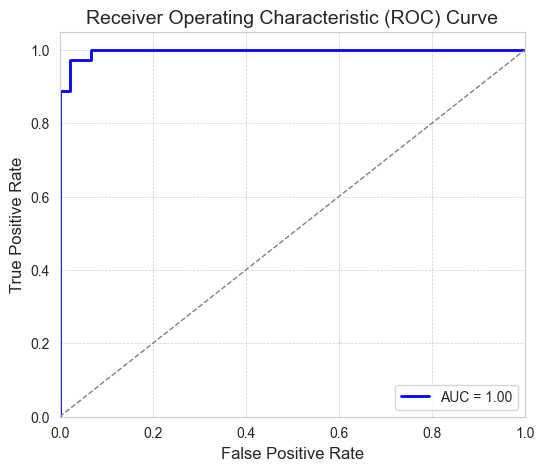

In [ ]:
y_probs = svc.predict_proba(test)[:, 1]  # Probability for class 1

fpr, tpr, _ = roc_curve(test_label, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=14)
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


In [ ]:
y_probs = svc.predict_proba(test)
loss = log_loss(test_label, y_probs)
print(f"Log Loss: {loss:.4f}")


Log Loss: 0.1206


**USING: LOGISTIC REGRESSION**

In [ ]:
logistic=LogisticRegression(C=0.003)  # L2 regularization
logistic.fit(train, train_label)
report_logistic=classification_report(test_label,logistic.predict(test), output_dict=True)
print(report_logistic)

{'0': {'precision': 0.9130434782608695, 'recall': 0.9545454545454546, 'f1-score': 0.9333333333333333, 'support': 44.0}, '1': {'precision': 0.9411764705882353, 'recall': 0.8888888888888888, 'f1-score': 0.9142857142857143, 'support': 36.0}, 'accuracy': 0.925, 'macro avg': {'precision': 0.9271099744245523, 'recall': 0.9217171717171717, 'f1-score': 0.9238095238095239, 'support': 80.0}, 'weighted avg': {'precision': 0.9257033248081841, 'recall': 0.925, 'f1-score': 0.9247619047619047, 'support': 80.0}}


In [ ]:
feature_importance = np.abs(logistic.coef_).flatten()

# Create DataFrame for visualization
importance_df = pd.DataFrame({'Feature': train.columns, 'Importance': feature_importance})

# Sort features by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)


Feature Importance (Sorted):
          Feature  Importance
4  Not Suggestive    0.412086
3      Suggestive    0.412077
0             Age    0.021929
1   DS-TB\n(Tick)    0.018744
2   DR-TB\n(Code)    0.018736
6            Axis    0.015108
5        Location    0.000691


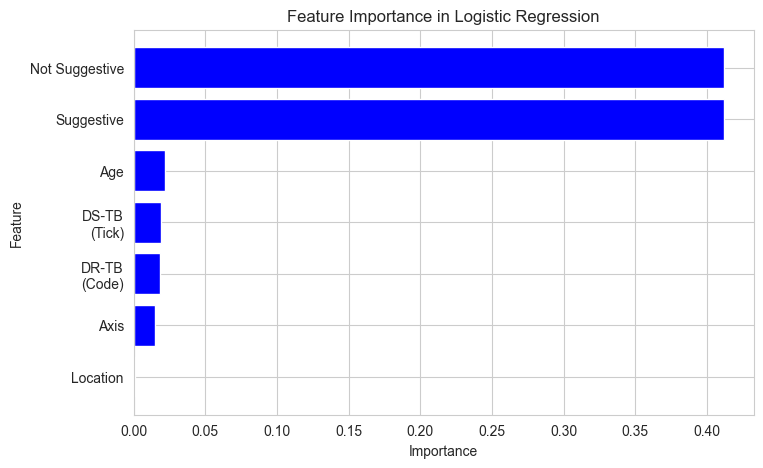

In [ ]:
print("Feature Importance (Sorted):")
print(importance_df)

plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Logistic Regression")
plt.gca().invert_yaxis()  # Show most important features at the top
plt.show()


<Figure size 800x500 with 0 Axes>

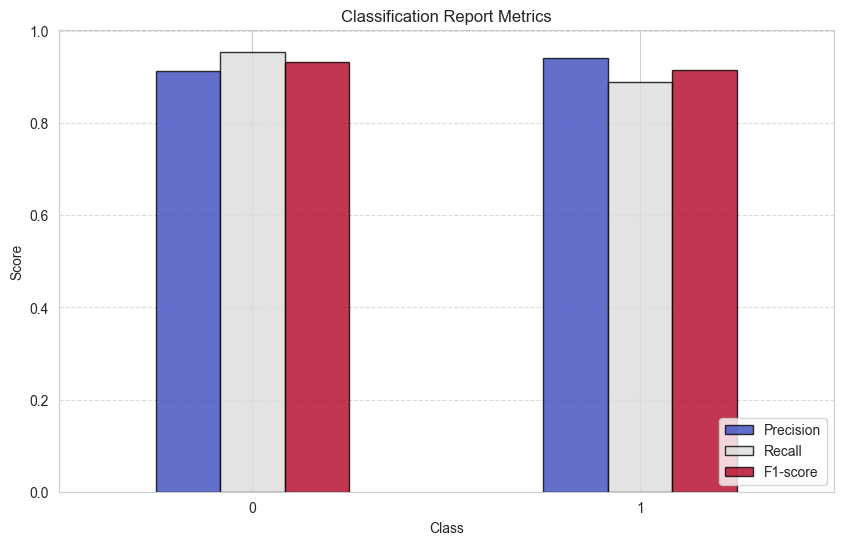

In [ ]:
df_report = pd.DataFrame(report_logistic).T.iloc[:-3, :-1]

# Plot the bar chart
plt.figure(figsize=(8, 5))
df_report.plot(kind="bar", figsize=(10, 6), cmap="coolwarm", alpha=0.8, edgecolor="black")

plt.title("Classification Report Metrics")
plt.xlabel("Class")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(["Precision", "Recall", "F1-score"], loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

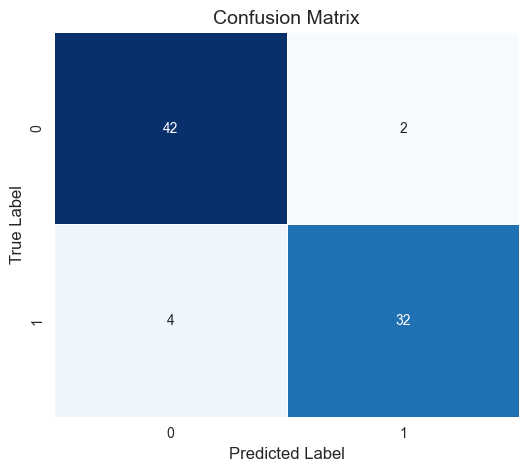

In [ ]:

cm = confusion_matrix(test_label, logistic.predict(test))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False)

plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)

plt.show()


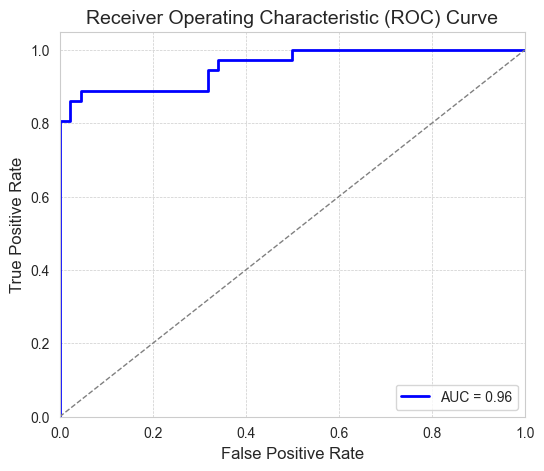

In [ ]:
y_probs = logistic.predict_proba(test)[:, 1]  # Probability for class 1

fpr, tpr, _ = roc_curve(test_label, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=14)
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


**USING: Naive bayes model**

In [ ]:
from sklearn.naive_bayes import *
gaus=GaussianNB(var_smoothing=5e-4)
gaus.fit(train, train_label)
report_gaus=classification_report(test_label,gaus.predict(test))
print(report_gaus)

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        44
           1       0.72      0.86      0.78        36

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.80      0.79      0.79        80



**Higher (less negative) values (e.g., -2.30) indicate more important features.**
**Lower (more negative) values (e.g., -8.52) indicate less important features.**

In [ ]:
feature_importance = -np.log(gaus.var_).mean(axis=0)  # Average across classes if needed

importance_df = pd.DataFrame({'Feature': train.columns, 'Importance': feature_importance})

importance_df = importance_df.sort_values(by="Importance", ascending=False)



              precision    recall  f1-score   support

           0       0.86      0.73      0.79        44
           1       0.72      0.86      0.78        36

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.80      0.79      0.79        80

Feature Importance (Sorted):
          Feature  Importance
3      Suggestive   -0.918167
4  Not Suggestive   -0.918167
1   DS-TB\n(Tick)   -0.927463
2   DR-TB\n(Code)   -0.927463
6            Axis   -0.961069
0             Age   -5.651384
5        Location   -8.518940


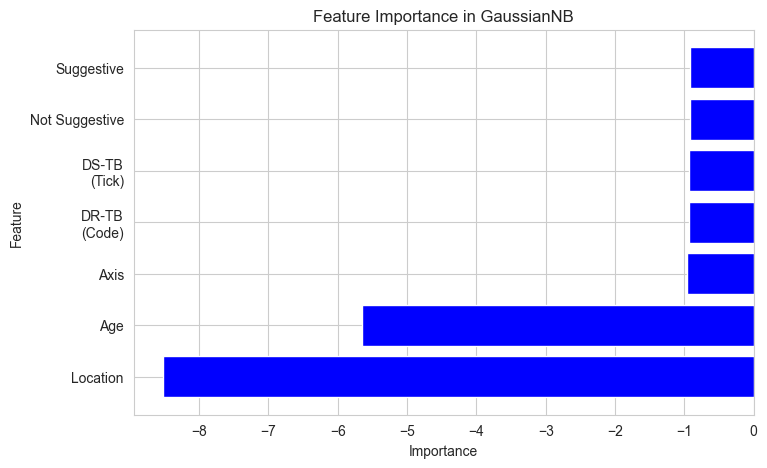

In [ ]:
# Print classification report
report_gaus = classification_report(test_label, gaus.predict(test))
print(report_gaus)

# Print sorted feature importance
print("Feature Importance (Sorted):")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in GaussianNB")
plt.gca().invert_yaxis()  # Show most important features at the top
plt.show()


<Figure size 800x500 with 0 Axes>

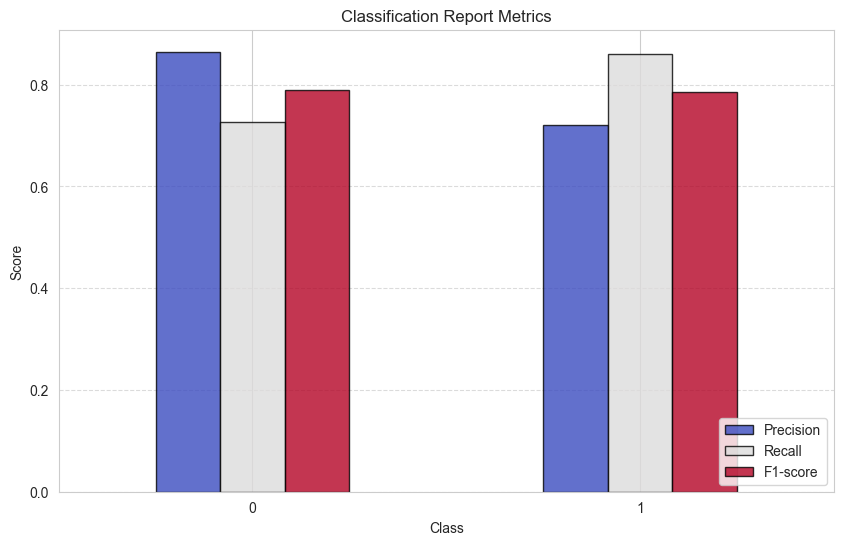

In [ ]:
report_gaus=classification_report(test_label,gaus.predict(test), output_dict=True)
df_report = pd.DataFrame(report_gaus).T.iloc[:-3, :-1]

# Plot the bar chart
plt.figure(figsize=(8, 5))
df_report.plot(kind="bar", figsize=(10, 6), cmap="coolwarm", alpha=0.8, edgecolor="black")

plt.title("Classification Report Metrics")
plt.xlabel("Class")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(["Precision", "Recall", "F1-score"], loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

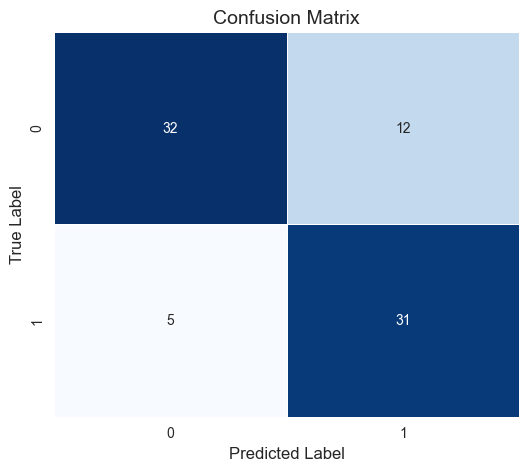

In [ ]:

cm = confusion_matrix(test_label, gaus.predict(test))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False)

plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)

plt.show()


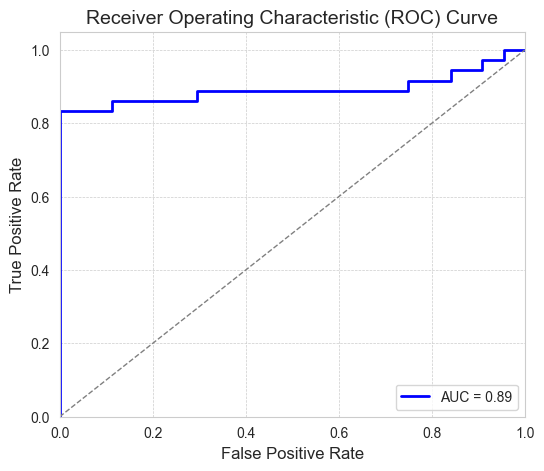

In [ ]:
y_probs = gaus.predict_proba(test)[:, 1]  # Probability for class 1

fpr, tpr, _ = roc_curve(test_label, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=14)
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


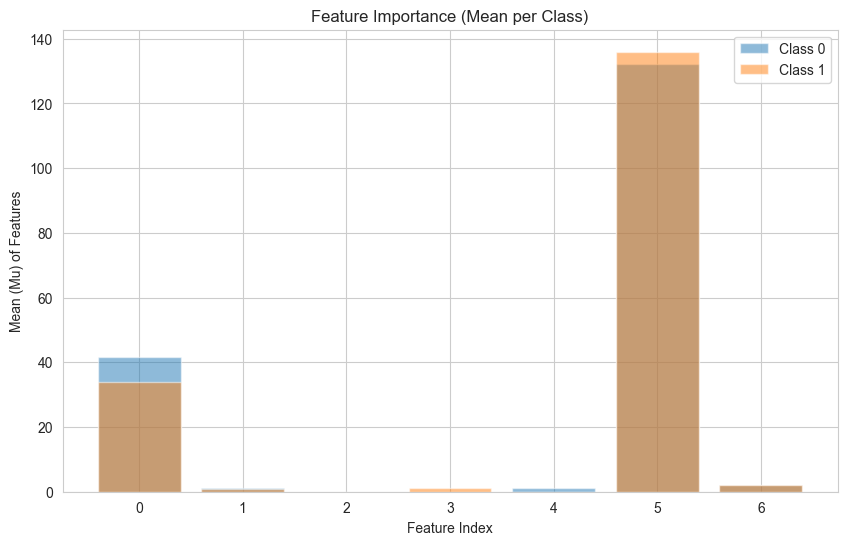

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get log probabilities for each class
log_probs = gaus.theta_  # Mean (mu) of each feature per class

# Plot feature importance
plt.figure(figsize=(10, 6))
for i, class_label in enumerate(gaus.classes_):
    plt.bar(range(train.shape[1]), log_probs[i], alpha=0.5, label=f'Class {class_label}')

plt.xlabel('Feature Index')
plt.ylabel('Mean (Mu) of Features')
plt.title('Feature Importance (Mean per Class)')
plt.legend()
plt.show()

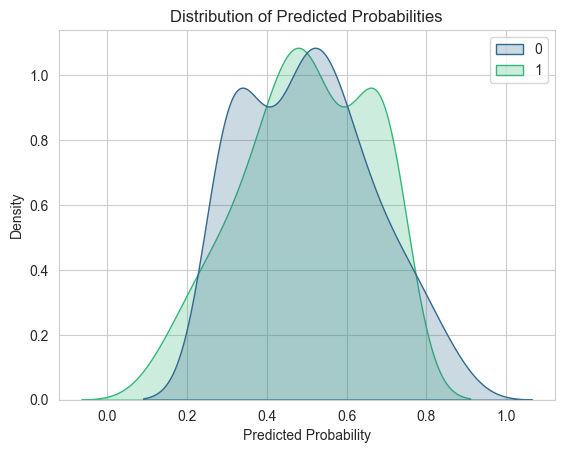

In [ ]:
y_probs_all = gaus.predict_proba(test)
prob_df = pd.DataFrame(y_probs_all, columns=gaus.classes_)

# Plot distribution of predicted probabilities
sns.kdeplot(data=prob_df, fill=True, palette='viridis')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Distribution of Predicted Probabilities')
plt.show()